## **Dependencies**

In [1]:
import gymnasium as gym
from src.dqn import run_dqn
from src.utils import plot_rewards
from src.utils import plot_epsilon
from src.utils import display_model
import pandas as pd

# **Lunar Lander Reinforcement Learning**

Dieses Projekt befasst sich mit der Implementierung und Anwendung eines Deep Q-Networks (DQN) zur Steuerung eines Lunar Landers in der Gymnasium-Umgebung `LunarLander-v2`. Ziel des Projekts ist es, einen Agenten zu trainieren, der in der Lage ist, das Landefahrzeug sicher auf dem Mond zu landen, indem er optimale Aktionen basierend auf dem aktuellen Zustand der Umgebung auswählt.

**Lunar Lander Enviroment:** 
- https://gymnasium.farama.org/environments/box2d/lunar_lander/

In dieser Ausarbeitung wurde sich maßgeblich am "Playing Atari with Deep Reinforcement Learning" Paper von Volodymyr Mnih et al. orientiert. Im Folgenden sind die Resultate des Trainingsprozesses dargestellt.

**Link zum "Playing Atari with Deep Reinforcement Learning" Paper:**
- https://arxiv.org/pdf/1312.5602


## **Train Agent**

### **Ziel**

Ein optimaler Zustand ist erreicht, sobald das Raumschiff sicher gelandet wurde und ein Gesamt-Reward (Score) von 200 erreicht wurde.

### **Aktionen**

Es stehen vier diskrete Aktionen zur Verfügung:

- **0**: Nichts tun
- **1**: Linken Steuerungstriebwerk zünden
- **2**: Haupttriebwerk zünden
- **3**: Rechten Steuerungstriebwerk zünden


### **Run DQN**


In [2]:
scores = run_dqn()

Episode 100	Average Score: -168.49	Epsilon: 0.61
Episode 200	Average Score: -108.80	Epsilon: 0.37
Episode 300	Average Score: -37.84	Epsilon: 0.226
Episode 400	Average Score: 40.74	Epsilon: 0.136
Episode 500	Average Score: 100.08	Epsilon: 0.08
Episode 600	Average Score: 141.80	Epsilon: 0.05
Episode 700	Average Score: 171.86	Epsilon: 0.03
Episode 800	Average Score: 152.41	Epsilon: 0.02
Episode 875	Average Score: 202.49	Epsilon: 0.01
Environment solved in 875 episodes!	Average Score: 202.49	Epsilon: 0.01


### **Training Reward**

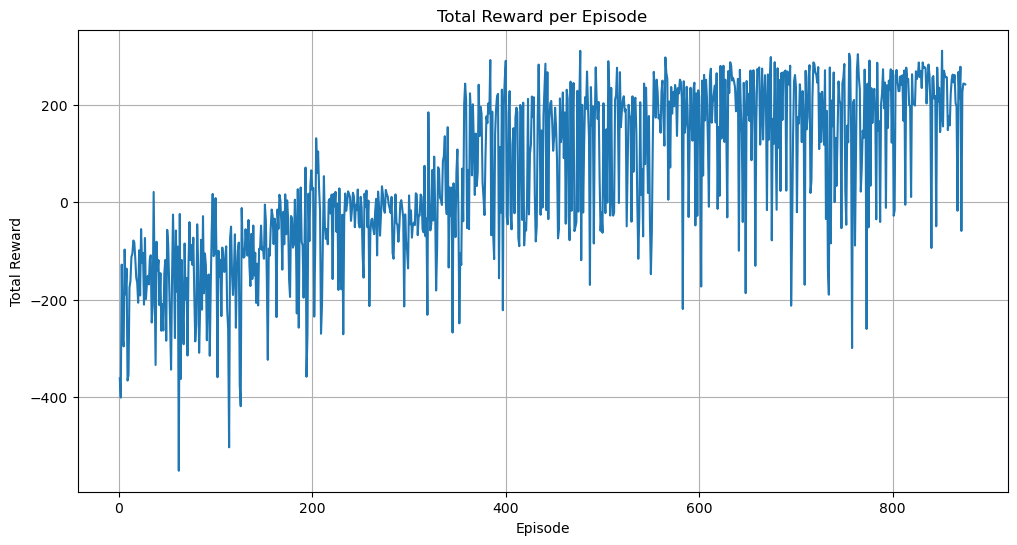

In [3]:
df = pd.read_csv('data/logs/training_log.csv')
episodes = df['Episode']
scores = df['Score']
epsilon = df['Epsilon']

plot_rewards(episodes, scores)

### **Epsilon Decay**

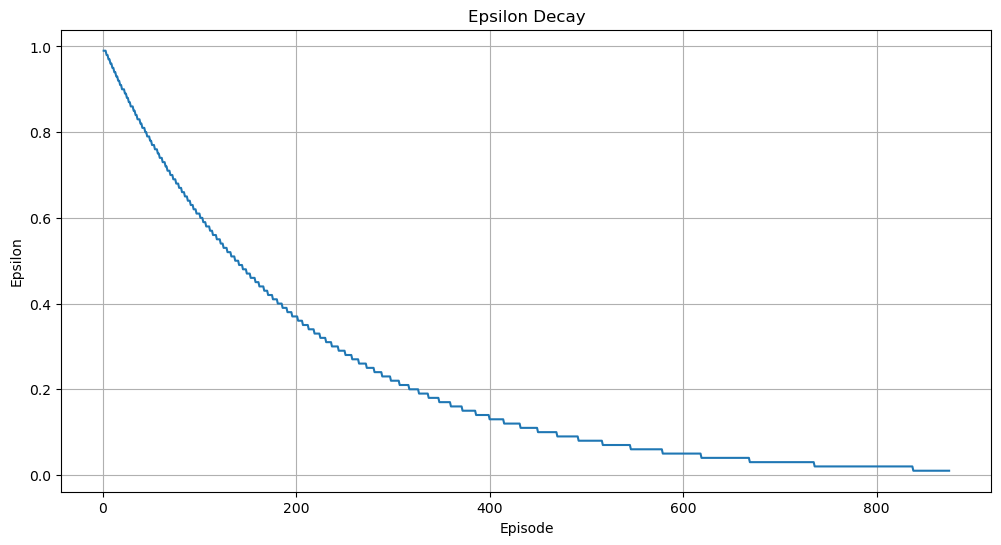

In [4]:
plot_epsilon(episodes, epsilon)

### **Demo** 

10 Sample Trys in Enviroment

In [7]:
env = gym.make('LunarLander-v2', render_mode="human")
display_model(env, 'data/checkpoints/checkpoint_final.pth')
env.close()

Try 1: Total Reward: -384.2846594447433
Try 2: Total Reward: 203.45178007806607
Try 3: Total Reward: 256.37295250120394
Try 4: Total Reward: 234.5359169783584
Try 5: Total Reward: 248.07103819556602
Try 6: Total Reward: 213.2352478249791
Try 7: Total Reward: 273.7689350540518
Try 8: Total Reward: 258.6051570760052
Try 9: Total Reward: 192.89510805497807
Try 10: Total Reward: 225.6664873834838
